In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams


import warnings
warnings.filterwarnings("ignore")

In [198]:
data_frame = pd.read_csv("reportedcases2020.csv") #read csv into pandas
data_frame

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,CASES,Unnamed: 7,CONTINENT
0,Countries,ABW,Aruba,2019,NTETANUS,Neonatal tetanus,0.0,NaN,SOUTH AMERICA
1,Countries,ABW,Aruba,2019,TYPHOID,Typhoid,0.0,NaN,SOUTH AMERICA
2,Countries,ABW,Aruba,2019,PERTUSSIS,Pertussis,0.0,NaN,SOUTH AMERICA
3,Countries,ABW,Aruba,2019,DIPHTHERIA,Diphtheria,0.0,NaN,SOUTH AMERICA
4,Countries,ABW,Aruba,2019,NNTETANUS,Non-neonatal tetanus,0.0,NaN,SOUTH AMERICA
...,...,...,...,...,...,...,...,...,...
80844,Countries,ZWE,Zimbabwe,1980,PERTUSSIS,Pertussis,6290.0,NaN,AFRICA
80845,Countries,ZWE,Zimbabwe,1980,MEASLES,Measles,23650.0,NaN,AFRICA
80846,Countries,ZWE,Zimbabwe,1980,POLIO,Poliomyelitis,32.0,NaN,AFRICA
80847,Countries,ZWE,Zimbabwe,1980,DIPHTHERIA,Diphtheria,8.0,NaN,AFRICA


In [149]:
data_frame.describe()

,YEAR,CASES,Unnamed: 7
count,80849.000000,6.183600e+04,0.0
mean,2002.330159,4.372756e+03,NaN
std,11.750248,5.558920e+04,NaN
min,1980.000000,0.000000e+00,NaN
25%,1993.000000,0.000000e+00,NaN
50%,2003.000000,1.000000e+00,NaN
75%,2012.000000,7.100000e+01,NaN
max,2020.000000,4.078455e+06,NaN


In [163]:
dp = data_frame.loc[data_frame['YEAR']>2015].drop_duplicates().reset_index(drop=True) #reducing columns to 5 years 

dp1 = dp.drop(["GROUP","CODE","Unnamed: 7"], axis = 1) #dropping group, code and unnamed column

In [185]:
dp1.CASES.sum()

30129130.0

In [209]:
dp1['CASES'].max()

1582164.0

In [169]:
dp1

,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,CASES,CONTINENT
0,Aruba,2019,NTETANUS,Neonatal tetanus,0.0,SOUTH AMERICA
1,Aruba,2019,TYPHOID,Typhoid,0.0,SOUTH AMERICA
2,Aruba,2019,PERTUSSIS,Pertussis,0.0,SOUTH AMERICA
3,Aruba,2019,DIPHTHERIA,Diphtheria,0.0,SOUTH AMERICA
4,Aruba,2019,NNTETANUS,Non-neonatal tetanus,0.0,SOUTH AMERICA
...,...,...,...,...,...,...
13373,Zimbabwe,2016,JAPENC,Japanese encephalitis,0.0,AFRICA
13374,Zimbabwe,2016,DIPHTHERIA,Diphtheria,0.0,AFRICA
13375,Zimbabwe,2016,YFEVER,Yellow fever,NaN,AFRICA
13376,Zimbabwe,2016,NTETANUS,Neonatal tetanus,0.0,AFRICA


In [183]:
q = dp1.groupby(["CONTINENT"]).sum()  #cases sum in each continent

e = q.drop(["YEAR"], axis = 1) #dropping year column 
e

,CASES
CONTINENT,
AFRICA,15225045.0
ASIA,3231271.0
AUSTRALIA,1705138.0
EUROPE,8990143.0
NORTH AMERICA,529294.0
SOUTH AMERICA,448239.0


<function matplotlib.pyplot.show(close=None, block=None)>

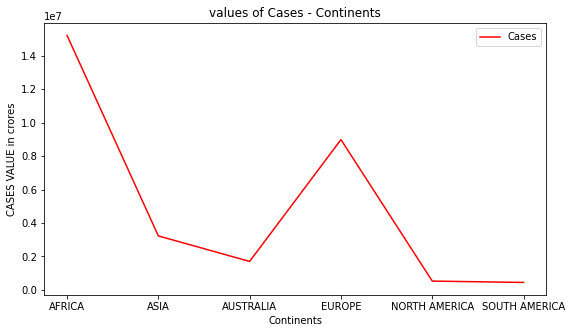

In [238]:
f = plt.figure()

#figure dimensions
f.set_figwidth(9) 
f.set_figheight(5)


plt.plot(e,'red', label = "Cases") #plot the chart

plt.ylabel("CASES VALUE in crores") #label - yaxis

plt.xlabel("Continents") #label - xaxis

plt.title("values of Cases - Continents",loc = 'center') #title for the graph

plt.legend()
plt.show #display

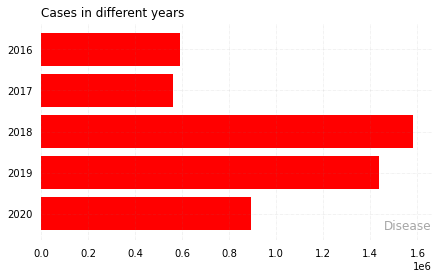

In [239]:
year = dp1['YEAR']
case = dp1['CASES']
 
# Figure Size
fig, ax = plt.subplots(figsize =(7, 4))
 
# Horizontal Bar Plot
ax.barh(year, case, color = 'red')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
  ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
   alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

 
# Add Plot Title
ax.set_title('Cases in different years',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15,'Disease', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
        alpha = 0.7)
 
# Show Plot
plt.show()

In [237]:
ty = dp1.loc[ dp1["DISEASE_DESCRIPTION"] == "Typhoid"]["CASES"].sum()
me = dp1.loc[ dp1["DISEASE_DESCRIPTION"] == "Measles"]["CASES"].sum()
mu = dp1.loc[ dp1["DISEASE_DESCRIPTION"] == "Mumps"]["CASES"].sum()
pe = dp1.loc[ dp1["DISEASE_DESCRIPTION"] == "Pertussis"]["CASES"].sum()

x1 = [ty,me,mu,pe]
x1

[3146444.0, 5069143.0, 6288899.0, 2165793.0]

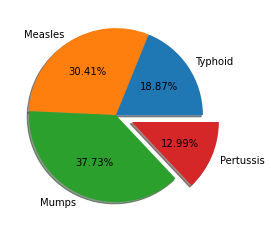

In [235]:
x1 = [ty,me,mu,pe]

explode = [0,0,0,0.2]

plt.pie(x1, #values
        labels = ["Typhoid","Measles","Mumps","Pertussis"], #labels of each section
        explode = explode, #to slice the particular section
        shadow = True, #showing shadow of pie chart
        autopct = "%0.2f%%") #Show data in persentage for with 2 decimal point

plt.show() #show plot